<a href="https://colab.research.google.com/github/Mayara-alvess/03.Projeto.risco_relativo/blob/main/03_projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto: Risco Relativo

In [1]:
#limpeza e manipucação de dados
import pandas as pd
import numpy as np

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,learning_curve, KFold
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf



In [2]:
df=pd.read_csv('dummyult.csv')

In [4]:
data=pd.read_csv('ultmatriz.csv')

## Informações Gerais

In [5]:
df.head()

,cliente_id,clientes_inadimplentes,idade_dummy,salario_dummy,emprestimos_dummy,linhas_nao_protegidas_dummy,mais90_dias_dummy,taxa_dummy,score_dummy,classificacao_clientes
0,26023,0,1,1,1,1,1,1,6,Inadimplente
1,29347,1,1,1,1,1,1,1,6,Inadimplente
2,16767,0,1,1,1,1,1,1,6,Inadimplente
3,31203,0,1,1,1,1,1,1,6,Inadimplente
4,28925,0,1,1,1,1,1,1,6,Inadimplente


In [6]:
# Converter a coluna 'classificacao_clientes' em binária
df['classificacao_binaria'] = df['classificacao_clientes'].map({'Adimplente': 0, 'Inadimplente': 1})

In [7]:
df.head()

,cliente_id,clientes_inadimplentes,idade_dummy,salario_dummy,emprestimos_dummy,linhas_nao_protegidas_dummy,mais90_dias_dummy,taxa_dummy,score_dummy,classificacao_clientes,classificacao_binaria
0,26023,0,1,1,1,1,1,1,6,Inadimplente,1
1,29347,1,1,1,1,1,1,1,6,Inadimplente,1
2,16767,0,1,1,1,1,1,1,6,Inadimplente,1
3,31203,0,1,1,1,1,1,1,6,Inadimplente,1
4,28925,0,1,1,1,1,1,1,6,Inadimplente,1


In [8]:
df.dtypes

,0
cliente_id,int64
clientes_inadimplentes,int64
idade_dummy,int64
salario_dummy,int64
emprestimos_dummy,int64
linhas_nao_protegidas_dummy,int64
mais90_dias_dummy,int64
taxa_dummy,int64
score_dummy,int64
classificacao_clientes,object


In [9]:
#resumo geral do dataframe
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35575 entries, 0 to 35574
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cliente_id                   35575 non-null  int64 
 1   clientes_inadimplentes       35575 non-null  int64 
 2   idade_dummy                  35575 non-null  int64 
 3   salario_dummy                35575 non-null  int64 
 4   emprestimos_dummy            35575 non-null  int64 
 5   linhas_nao_protegidas_dummy  35575 non-null  int64 
 6   mais90_dias_dummy            35575 non-null  int64 
 7   taxa_dummy                   35575 non-null  int64 
 8   score_dummy                  35575 non-null  int64 
 9   classificacao_clientes       35575 non-null  object
 10  classificacao_binaria        35575 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 3.0+ MB


Sem valores ausentes

## Regressão Logistica

In [10]:
# Dividindo os dados em conjuntos de treinando e teste
X = df.drop(['classificacao_clientes'], axis = 1) #caracteristicas = variaveis
y = df['classificacao_clientes'] #target = alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#treino: 70% e teste:30%


In [11]:
X_test

,cliente_id,clientes_inadimplentes,idade_dummy,salario_dummy,emprestimos_dummy,linhas_nao_protegidas_dummy,mais90_dias_dummy,taxa_dummy,score_dummy,classificacao_binaria
22879,16549,0,1,0,1,0,0,0,2,0
16801,26903,0,0,1,1,0,0,0,2,0
25700,2373,0,0,1,0,1,1,0,3,0
8193,21399,0,1,0,0,0,0,0,1,0
18837,6321,0,0,1,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
461,2516,0,0,0,0,0,0,0,0,0
2705,28964,0,0,0,0,0,0,0,0,0
29460,23519,0,1,0,1,0,1,0,3,0
22215,20718,0,0,0,0,1,1,0,2,0


In [12]:
cols = df.columns.drop([ 'classificacao_binaria','classificacao_clientes'])
formula = 'classificacao_binaria ~ ' + ' + '.join(cols)
print(formula)


classificacao_binaria ~ cliente_id + clientes_inadimplentes + idade_dummy + salario_dummy + emprestimos_dummy + linhas_nao_protegidas_dummy + mais90_dias_dummy + taxa_dummy + score_dummy


In [13]:

# Executando o modelo e relatando os resultados#
model = smf.glm(formula=formula, data=X_train.join(y_train), family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


                   Generalized Linear Model Regression Results                   
Dep. Variable:     classificacao_binaria   No. Observations:                24902
Model:                               GLM   Df Residuals:                    24893
Model Family:                   Binomial   Df Model:                            8
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -1.3481e-09
Date:                   Wed, 14 Aug 2024   Deviance:                   2.6966e-09
Time:                           13:56:02   Pearson chi2:                 1.35e-09
No. Iterations:                       31   Pseudo R-squ. (CS):             0.5103
Covariance Type:               nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [14]:
# Obter os coeficientes do modelo
coef = logistic_fit.params

# Exibir os coeficientes e suas respectivas variáveis
print("\nCoeficientes do Modelo:")
print(coef)

# Exibir a importância das variáveis
importance = abs(coef).sort_values(ascending=False)
print("\nImportância das Variáveis (absoluta):")
print(importance)



Coeficientes do Modelo:
Intercept                     -2.054861e+02
cliente_id                     7.641841e-07
clientes_inadimplentes         1.497304e-01
idade_dummy                    8.221866e+00
salario_dummy                  8.249203e+00
emprestimos_dummy              8.295471e+00
linhas_nao_protegidas_dummy    8.584560e+00
mais90_dias_dummy              8.510536e+00
taxa_dummy                     8.450344e+00
score_dummy                    5.031198e+01
dtype: float64

Importância das Variáveis (absoluta):
Intercept                      2.054861e+02
score_dummy                    5.031198e+01
linhas_nao_protegidas_dummy    8.584560e+00
mais90_dias_dummy              8.510536e+00
taxa_dummy                     8.450344e+00
emprestimos_dummy              8.295471e+00
salario_dummy                  8.249203e+00
idade_dummy                    8.221866e+00
clientes_inadimplentes         1.497304e-01
cliente_id                     7.641841e-07
dtype: float64


In [15]:
# Obter a fórmula ajustada
formula_ajustada = logistic_fit.params
print("Fórmula ajustada:", formula_ajustada)



Fórmula ajustada: Intercept                     -2.054861e+02
cliente_id                     7.641841e-07
clientes_inadimplentes         1.497304e-01
idade_dummy                    8.221866e+00
salario_dummy                  8.249203e+00
emprestimos_dummy              8.295471e+00
linhas_nao_protegidas_dummy    8.584560e+00
mais90_dias_dummy              8.510536e+00
taxa_dummy                     8.450344e+00
score_dummy                    5.031198e+01
dtype: float64


In [16]:
# Separar os dados em variáveis independentes (X) e variável dependente (y)
X = df.drop(['classificacao_clientes'], axis=1)  # features
y = df['classificacao_clientes']  # target

# Verificar e converter variáveis categóricas em variáveis numéricas
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e ajustar o modelo de Regressão Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Prever os valores no conjunto de teste
y_pred = logistic_model.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcular outras métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, pos_label='Inadimplente')
recall = recall_score(y_test, y_pred, pos_label='Inadimplente')
f1 = f1_score(y_test, y_pred, pos_label='Inadimplente')

# Mostrar a matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Mostrar as métricas de avaliação
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Acurácia: {acuracia:.3f}")
print(f"Precisão: {precisao:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matriz de Confusão:
[[9340    0]
 [   0 1333]]

Métricas de Avaliação:
Acurácia: 1.000
Precisão: 1.000
Recall: 1.000
F1-score: 1.000


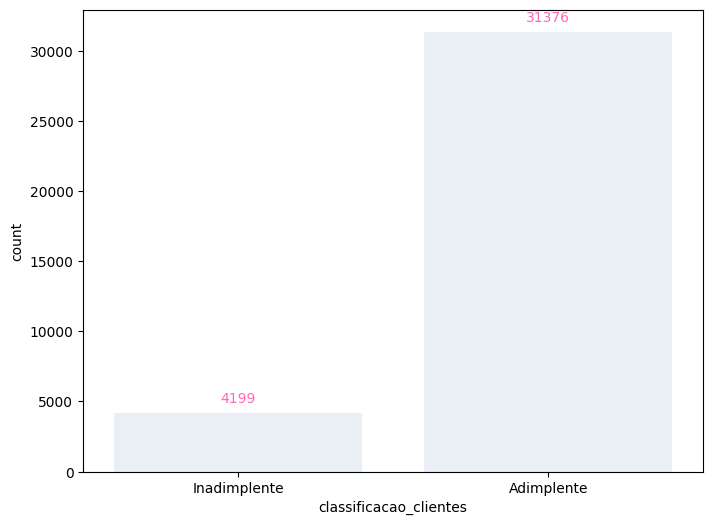

In [17]:

# Definindo as cores
cor_barra = "#e7eff6"
cor_texto = "#ff69b4"

# Visualizar a distribuição das classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df['classificacao_clientes'], color=cor_barra)

# Adicionar números de contagem acima de cada barra com a cor especificada
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                color=cor_texto)

plt.show()




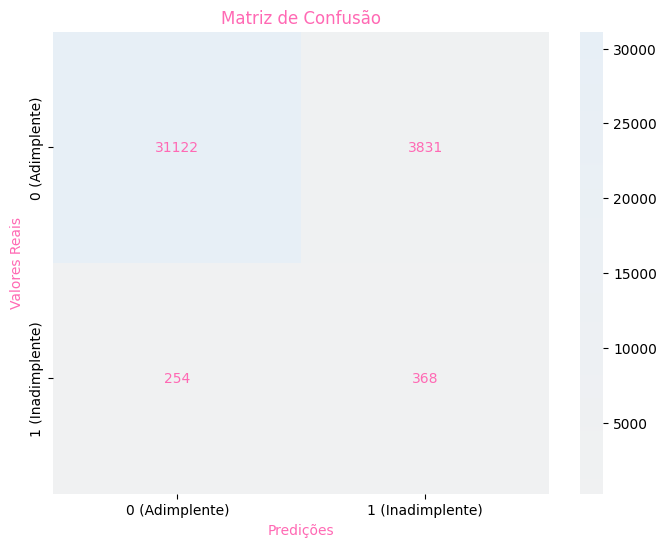

Matriz de Confusão:
[[31122  3831]
 [  254   368]]
Verdadeiro Negativo (VN): 31122
Falso Positivo (FP): 3831
Falso Negativo (FN): 254
Verdadeiro Positivo (VP): 368

Métricas de Avaliação:
Acurácia: 0.885
Acurácia Balanceada: 0.741
Precisão: 0.088
Recall: 0.592
F1-score: 0.153


In [28]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a classificação para valores binários
df['classificacao_binaria'] = df['classificacao_clientes'].map({'Adimplente': 0, 'Inadimplente': 1})

# Obtendo as etiquetas verdadeiras e preditas
y_true = df['clientes_inadimplentes']
y_pred = df['classificacao_binaria']

# Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_true, y_pred)
acuracia_balanceada = balanced_accuracy_score(y_true, y_pred)
precisao = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Definindo as cores
cor_barra = "#e7eff6"
cor_texto = "#ff69b4"

# Visualização gráfica da matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette(cor_barra, as_cmap=True),
            annot_kws={"color": cor_texto}, xticklabels=['0 (Adimplente)', '1 (Inadimplente)'],
            yticklabels=['0 (Adimplente)', '1 (Inadimplente)'])
plt.xlabel('Predições', color=cor_texto)
plt.ylabel('Valores Reais', color=cor_texto)
plt.title('Matriz de Confusão', color=cor_texto)
plt.show()

# Valores Verdadeiros Positivos (VP), Falsos Positivos (FP), Verdadeiros Negativos (VN) e Falsos Negativos (FN)
vn, fp, fn, vp = cm.ravel()

# Mostrar a Matriz de Confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)
print(f"Verdadeiro Negativo (VN): {vn}")
print(f"Falso Positivo (FP): {fp}")
print(f"Falso Negativo (FN): {fn}")
print(f"Verdadeiro Positivo (VP): {vp}")

# Mostrar as Métricas de Avaliação
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Acurácia: {acuracia:.3f}")
print(f"Acurácia Balanceada: {acuracia_balanceada:.3f}")
print(f"Precisão: {precisao:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")




Matriz de confusão:
 Verdadeiros negativos 31122 clientes que não devem e o modelo identifificou corretamente.
 Falsos positivos 3831 clientes que não devem e o modelo identificou que devem.
 Falsos negativos 254 clientes que devem e o modelo identificou corretamente.
 Verdadeiros positivos 368 clientes clientes que devem e o modelo identificou corretamente.

Os resultados mostram que o modelo tem uma acurácia balanceada de 0.74%, indicando que, em média, está classificando corretamente 0,74% das amostras. No entanto, o baixo F1-score de 0.15% sugere que o modelo está tendo dificuldades em alcançar um equilíbrio entre precisão e recall. Para melhoria futura,  podemos explorar diferentes modelos ou ajustar os parâmetros.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


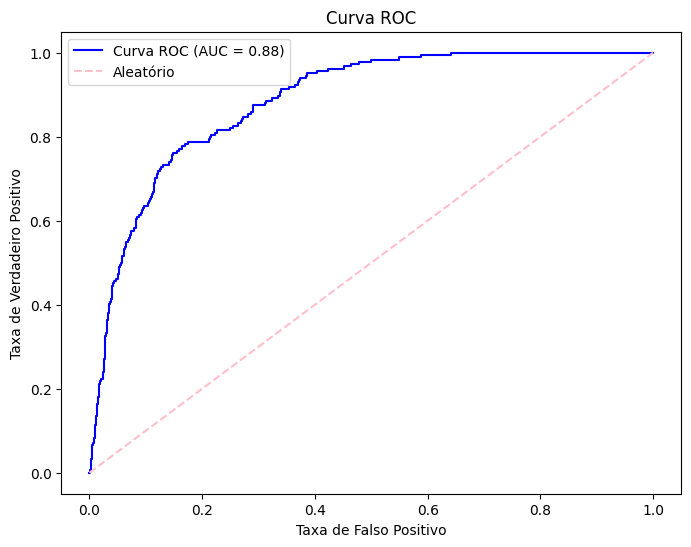

Área Sob a Curva (AUC): 0.884839500594826


In [24]:

# Selecionar apenas as colunas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Selecionar apenas as colunas categóricas
categorical_df = df.select_dtypes(include=['object'])

# Aplicar codificação One-Hot Encoding nas colunas categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(categorical_df)

# Obter os nomes das colunas codificadas
encoded_columns = encoder.get_feature_names_out(categorical_df.columns)

# Criando um DataFrame com os dados codificados
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)

# Combinar os dataframes numéricos e codificados
processed_df = pd.concat([numeric_df, encoded_categorical_df], axis=1)

# Separar os dados em variáveis independentes (X) e variável dependente (y)
X = processed_df.drop(columns=['clientes_inadimplentes'])  # Features
y = processed_df['clientes_inadimplentes']  # Target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e ajustar o modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Calcular as probabilidades previstas pelo modelo de regressão logística
probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calcular a área sob a curva ROC (AUC)
auc = roc_auc_score(y_test, probabilities)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', label='Aleatório')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend()
plt.show()

print("Área Sob a Curva (AUC):", auc)


Interpretação da Curva ROC:

Quanto mais a curva se aproxima do canto superior esquerdo do gráfico, melhor é o desempenho do modelo, pois isso indica uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos.
Uma curva ROC que está muito próxima da diagonal (linha de 45 graus) indica que o modelo não possui capacidade de discriminação.

### Regressão logistica utilizando a técnica SMOTE devido ao desbalanceamento dos dados

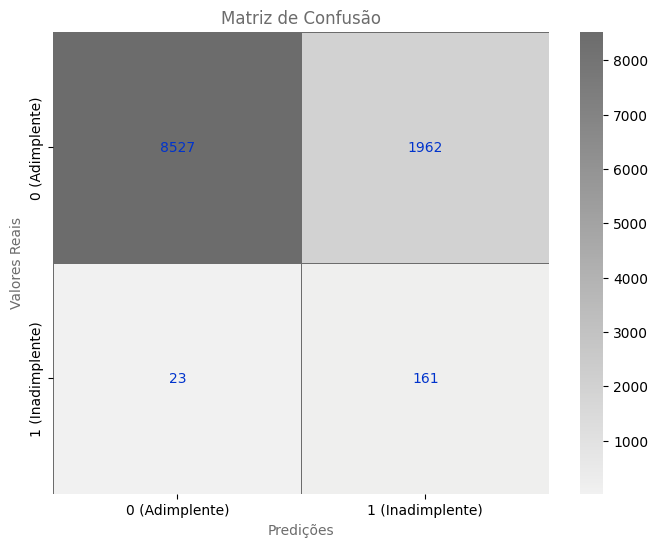

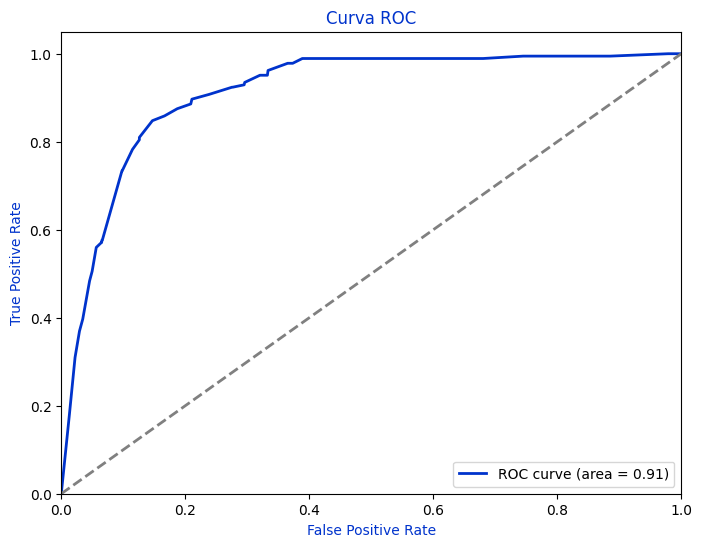

Matriz de Confusão:
[[8527 1962]
 [  23  161]]
Verdadeiro Negativo (VN): 8527
Falso Positivo (FP): 1962
Falso Negativo (FN): 23
Verdadeiro Positivo (VP): 161

Métricas de Avaliação:
Acurácia: 0.814
Precisão: 0.076
Recall: 0.875
F1-score: 0.140
ROC AUC: 0.913
Log Loss: 0.390


In [29]:

# Converter a classificação para valores binários
df['classificacao_binaria'] = df['classificacao_clientes'].map({'Adimplente': 0, 'Inadimplente': 1})

# Selecionar as variáveis independentes e a variável dependente
X = df[['idade_dummy', 'salario_dummy', 'emprestimos_dummy', 'linhas_nao_protegidas_dummy', 'mais90_dias_dummy', 'taxa_dummy']]
y = df['clientes_inadimplentes']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para balancear os dados de treino
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Treinar um modelo de Regressão Logística
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train_bal, y_train_bal)

# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades das previsões

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calcular métricas de avaliação
acuracia = accuracy_score(y_test, y_pred)
acuracia_balanceada = balanced_accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
log_loss_value = log_loss(y_test, y_pred_proba)

# Definindo as cores
cor_matriz = "#6c6c6c"  # Cinza escuro mais claro para a matriz
cor_texto = "#0033cc"   # Azul escuro para os números da matriz
cor_roc = "#0033cc"     # Azul escuro para a Curva ROC

# Visualização gráfica da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.light_palette(cor_matriz, as_cmap=True),
            annot_kws={"color": cor_texto}, xticklabels=['0 (Adimplente)', '1 (Inadimplente)'],
            yticklabels=['0 (Adimplente)', '1 (Inadimplente)'], linewidths=0.5, linecolor=cor_matriz)
plt.xlabel('Predições', color=cor_matriz)
plt.ylabel('Valores Reais', color=cor_matriz)
plt.title('Matriz de Confusão', color=cor_matriz)
plt.show()

# Calcular os valores da Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Visualização gráfica da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=cor_roc, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', color=cor_roc)
plt.ylabel('True Positive Rate', color=cor_roc)
plt.title('Curva ROC', color=cor_roc)
plt.legend(loc="lower right")
plt.show()

# Valores Verdadeiros Positivos (VP), Falsos Positivos (FP), Verdadeiros Negativos (VN) e Falsos Negativos (FN)
vn, fp, fn, vp = cm.ravel()

# Mostrar a Matriz de Confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)
print(f"Verdadeiro Negativo (VN): {vn}")
print(f"Falso Positivo (FP): {fp}")
print(f"Falso Negativo (FN): {fn}")
print(f"Verdadeiro Positivo (VP): {vp}")

# Mostrar as Métricas de Avaliação
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Acurácia: {acuracia:.3f}")
print(f"Precisão: {precisao:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print(f"Log Loss: {log_loss_value:.3f}")







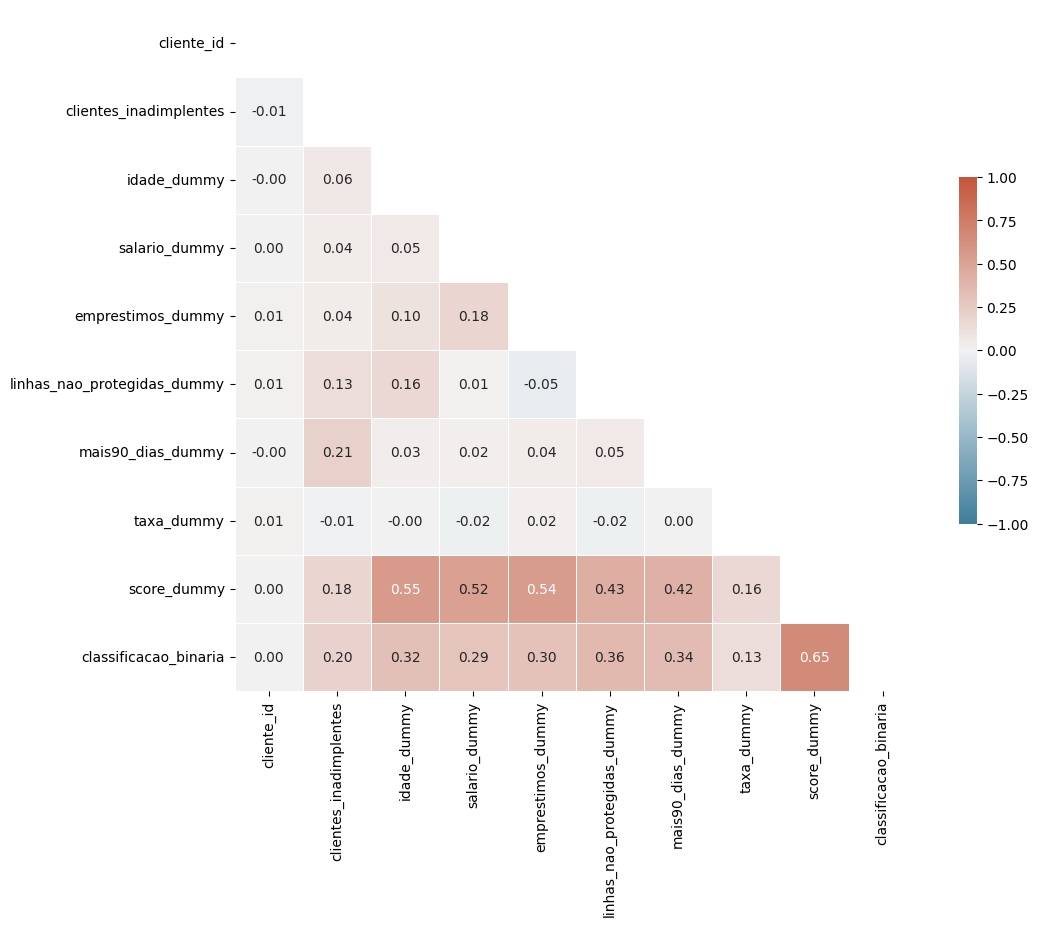

In [22]:

# Selecionando apenas colunas numéricas para cálculo de correlação
numeric_df = df.select_dtypes(include=[np.number])

# Gerar e visualizar a matriz de correlação
corr = numeric_df.corr().round(2)

# Código para remover o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gere um mapa de cores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenhe o mapa de calor com a máscara e a proporção correta e anote os valores
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()


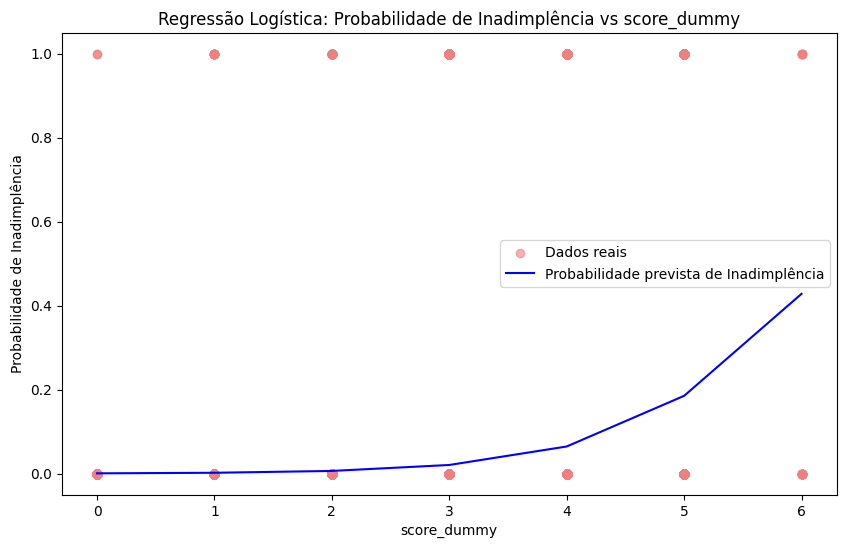

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Criando e ajustando o modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(df[['score_dummy']], df['clientes_inadimplentes'])

# Calculando as probabilidades previstas para os valores existentes em "score_dummy"
probabilities = logistic_model.predict_proba(df[['score_dummy']])[:, 1]

# Plotando o gráfico
plt.figure(figsize=(10, 6))

# Pontos de dados reais com bolinhas rosa claro
plt.scatter(df['score_dummy'], df['clientes_inadimplentes'], alpha=0.6, color='lightcoral', label='Dados reais')

# Curva de probabilidade da regressão logística
# Ordenando os valores para uma curva suave
sorted_indices = np.argsort(df['score_dummy'])
sorted_score_dummy = df['score_dummy'].iloc[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]
plt.plot(sorted_score_dummy, sorted_probabilities, color='blue', label='Probabilidade prevista de Inadimplência')

# Títulos e rótulos
plt.title('Regressão Logística: Probabilidade de Inadimplência vs score_dummy')
plt.xlabel('score_dummy')
plt.ylabel('Probabilidade de Inadimplência')
plt.legend()

plt.show()



Esse gráfico proporciona uma visão geral do desempenho do modelo e serve como base para ajustes futuros, ajudando a refinar as previsões e a melhorar a precisão do modelo de regressão logística.

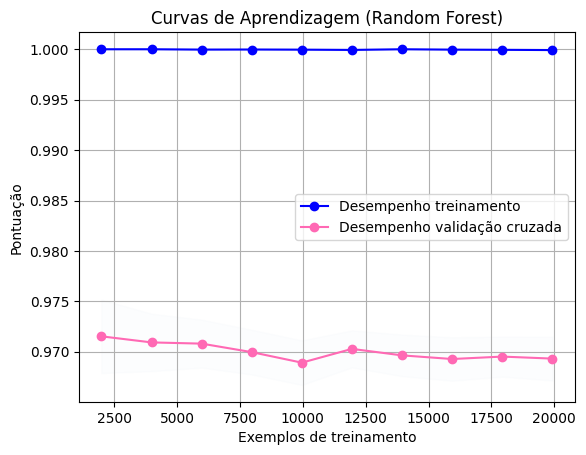

In [25]:

# Gerando a curva de aprendizado
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Exemplos de treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Cores específicas
    cor_preenchimento = "#e7eff6"
    cor_linha_treinamento = "blue"
    cor_linha_validacao = "#ff69b4"

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color=cor_preenchimento)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color=cor_preenchimento)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=cor_linha_treinamento, label="Desempenho treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=cor_linha_validacao, label="Desempenho validação cruzada")

    plt.legend(loc="best")
    plt.show()

# Configurando e plotando o grafico da curva
title = "Curvas de Aprendizagem (Random Forest)"
cv = KFold(n_splits=5)
rf_model = RandomForestClassifier()
plot_learning_curve(rf_model, title, X_train, y_train, cv=cv)




Desempenho de Treinamento:

Refere-se à precisão do modelo nos dados de treinamento.
O desempenho de treinamento é calculado usando os mesmos dados que o modelo viu durante o treinamento.
Pode ser enganoso, pois um modelo pode se ajustar demais aos dados de treinamento e não generalizar bem para novos dados.

Desempenho de Validação Cruzada:

Refere-se à precisão do modelo em dados que não foram usados durante o treinamento.
A validação cruzada é uma técnica para estimar o desempenho de um modelo em dados não vistos.
Divide os dados em várias partes (folds), treina o modelo em uma parte e avalia em outra, repetindo o processo para todos os folds e calculando a média das métricas de avaliação.
